In [3]:
import numpy as np
import pandas
import matplotlib.pyplot as plt

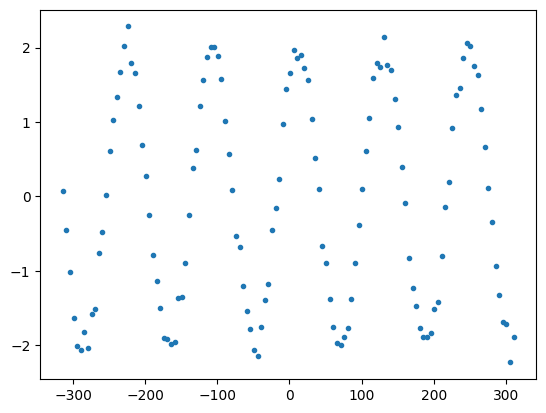

In [4]:
df = pandas.read_csv('datos.csv')
X = df['x'].values
Y = df['y'].values
plt.figure()
plt.plot(X, Y, '.')
plt.show()

We want to find the ideal values `P = [A, B, C]` to ressemble the function `f(x) = Asin(Bx + Cπ)`.

643.4350369300496


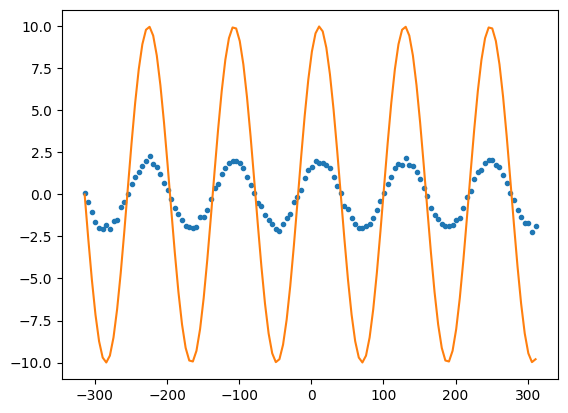

In [5]:
def objective_function(P, X, Y):
    A, B, C = P[0], P[1], P[2]
    Yp = A*np.sin(B*X + C*np.pi)
    return np.sum(np.abs(Y - Yp))
def draw_solution(P, X, Y):
    A, B, C = P[0], P[1], P[2]
    Yp = A*np.sin(B*X + C*np.pi)
    plt.figure()
    plt.plot(X, Y, '.')
    plt.plot(X, Yp)
    plt.show()
P = [10, 10, 10]
print(objective_function(P, X, Y))
draw_solution(P, X, Y)

# Scipy Differential Evolution

In [6]:
from scipy.optimize import differential_evolution

In [7]:
# P = [A, B, C]
# f(x) = A*sin(B*x, + C*pi)

bounds = [
    [-100, 100],
    [-100, 100],
    [-100, 100]
]

In [8]:
res = differential_evolution(objective_function, bounds, args = (X, Y))
res

     fun: 10.650318723430148
 message: 'Optimization terminated successfully.'
    nfev: 11741
     nit: 256
 success: True
       x: array([ 1.99285768, 47.80534734, -0.46970175])

10.650318723430148


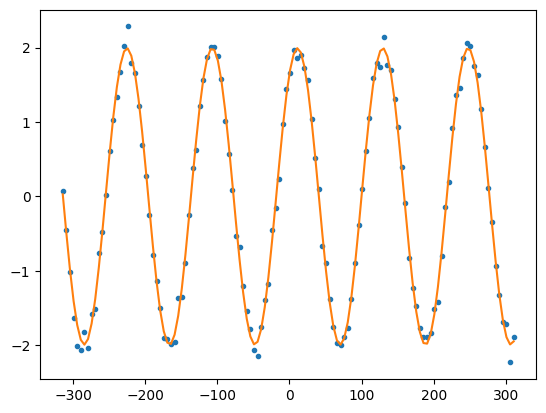

In [9]:
P = res.x
print(objective_function(P, X, Y))
draw_solution(P, X, Y)

# Evolutionary Programming

In [10]:
from evolutionary_programming import evolutionary_programming

In [11]:
res = evolutionary_programming(objective_function, bounds, args = (X, Y), popsize = 250, ngen = 100)
res

{'P': array([  2.27220974,  33.98169455, -12.82544751]),
 'nIt': 100,
 'fun': 39.29841763557656,
 'nFev': 50000}

39.29841763557656


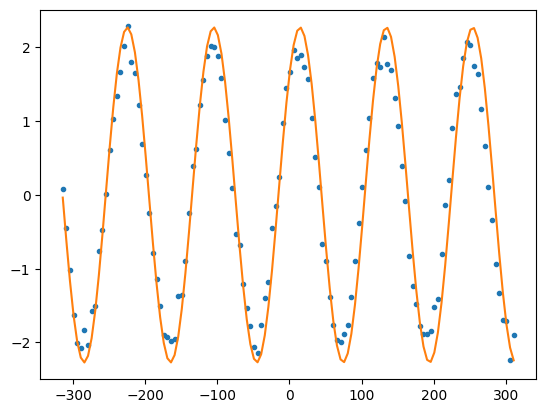

In [12]:
P = res['P']
print(objective_function(P, X, Y))
draw_solution(P, X, Y)